# Predictive Models using Cleaned Costa Rica Household Data

Group members: Gregory Ho, Jonathan Juarez, Sarah Walker, Yueyue Wang

(Alphabetic order of first name)

Our submission of for Checkpoint 2 consist of two notebooks. This is the second notebook.

This notebook contains a summary of the steps we took in constructing ML models, and model performance for this Multi-class poverty prediction problem.


### 1. Logistic Regression Modeling

#### Overview

Conducting a logistic regression model (LG) with the Costa Rica household survey data can provide valuable insights and predictive capabilities for various reasons. First, LG is particularly suitable for classification problems, such as predicting the poverty levels of each household. By using LG, we can model the relationship between independent variables of the dataset and the target variable (e.g., poverty level) to estimate the probability of belonging to one of the four poverty levels. This enables us to make probabilistic predictions and understand the factors that significantly influence the outcome.

Logistic regression offers several advantages that make it a preferred modeling approach for household survey data. It is interpretable, allowing us to assess the impact and significance of each independent variable on the outcome. Since the survey data has both binary and continuous variables, using LG is suitable for integrating the over one hundred dimensions in the dataset. LG can also handle multicollinearity by measuring the variance inflation factor (VIF) and is less sensitive to outliers compared to some other models. This robustness ensures reliable predictions even in the presence of correlated variables or extreme data points.

There are limitations in using LG with household survey data, which will be addressed after running a baseline LG model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_lg.csv to cleaned_data_lg.csv


Since LG models perform classification without the usage of categorical variables, and the original dataset includes a variety of dummy variables, the inclusion of the new feature categorical variables that we created will not be necessary for this model.

In [ ]:
data_lg = pd.read_csv('cleaned_data_lg.csv')

NameError: ignored

In [ ]:
# Group by 'idhogar' and set it as the new index, drop id column
df_hh = data_lg.groupby('idhogar').first()
df_hh = df_hh.drop(columns=['Id'])

First, we will split the data into our X feature matrix and our y target data sets.

In [ ]:
from sklearn.model_selection import train_test_split
X = df_hh.drop(columns='Target')
y = df_hh['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1)

columns_with_nan = X_train.columns[X_train.isna().any()].tolist()
columns_with_nan

[]

Here we will use a scalar in order to equalize the features since LG is sensitive to the scales of the predictor variables. For example, feature v2a1, which are the rent payments of each household, is a numerical value that is much greater than the binary variables in the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we will create the LG model and run the first test without changing any parameters.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_predicted_training = log_reg.predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
training_score = log_reg.score(X_train_scaled, y_train)
test_score = log_reg.score(X_test_scaled, y_test)
print('Training Score:', training_score)
print('Testing Score:', test_score)
print('Classication Report:')
print(classification_report(y_predicted_training, y_train))

Training Score: 0.7900048053820279
Testing Score: 0.7163677130044843
Classication Report:
              precision    recall  f1-score   support

           1       0.51      0.62      0.56       141
           2       0.54      0.58      0.56       287
           3       0.37      0.53      0.43       166
           4       0.95      0.87      0.91      1487

    accuracy                           0.79      2081
   macro avg       0.59      0.65      0.62      2081
weighted avg       0.82      0.79      0.80      2081



The model seems to have a high accuracy, but we can see the large discrepencies between the training score and the testing score, which is a strong indicator of a poor model. We will now add extra parameters, such as a regularization term of 0.01 and add a fitted intercept, to control for any overfitness and biasness in the model.

In [ ]:
#Adding regularization and fit intercept
log_reg2 = LogisticRegression(random_state=0,
                              C = 0.01,
                              fit_intercept= True
                              ).fit(X_train_scaled, y_train)
training_score = log_reg2.score(X_train_scaled, y_train)
test_score = log_reg2.score(X_test_scaled, y_test)
y_predicted_training = log_reg2.predict(X_train_scaled)
logistic_report_dict = classification_report(y_predicted_training, y_train, output_dict=True)
print('Training Score:', training_score)
print('Testing Score:', test_score)
print('Classification Report:')
print(classification_report(y_predicted_training, y_train))

Training Score: 0.7371456030754445
Testing Score: 0.6816143497757847
Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.69      0.40        71
           2       0.40      0.53      0.45       234
           3       0.16      0.57      0.25        69
           4       0.97      0.78      0.86      1707

    accuracy                           0.74      2081
   macro avg       0.45      0.64      0.49      2081
weighted avg       0.86      0.74      0.78      2081



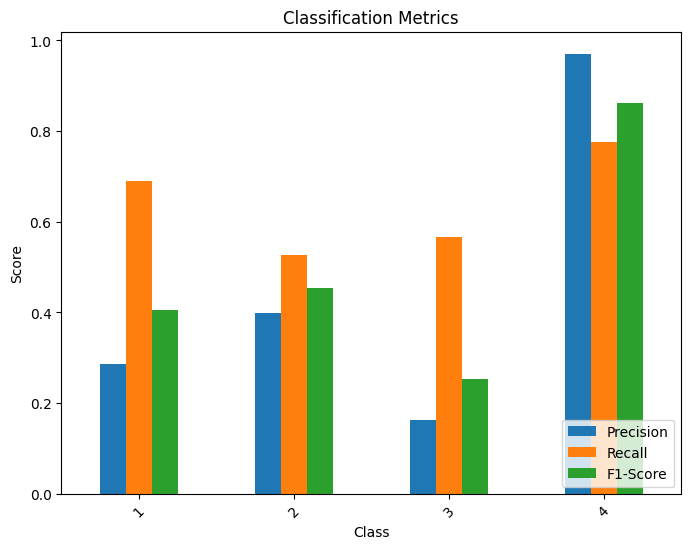

  Class  Precision    Recall  F1-Score  Support
0     1   0.286550  0.690141  0.404959       71
1     2   0.399351  0.525641  0.453875      234
2     3   0.163180  0.565217  0.253247       69
3     4   0.970653  0.775044  0.861889     1707


In [ ]:
# Parsing the classification report dictionary
report_data = []
for class_label, metrics in logistic_report_dict.items():
    if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
        row = [class_label, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']]
        report_data.append(row)

# Creating a DataFrame from the classification report data
df = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

# Creating a bar graph for precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-Score']
df[metrics] = df[metrics].astype(float)
df.plot(x='Class', y=metrics, kind='bar', figsize=(8, 6))
plt.title('Classification Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()

# Displaying the classification report table
print(df)

We can see that including these parameters narrowed the differences between the scores, but we can do better.

#### Adjusting the model

There are various limitations in using logsitic regression, but from using the above dataset, we have determined some of the issues may include:

1. Independence assumption: Logistic regression assumes that observations are independent of each other. However, in household survey data, observations within the same household may be correlated. Violation of this assumption can lead to biased coefficient estimates and inflated standard errors.

2. Imbalanced classes: If the distribution of the outcome variable is heavily imbalanced, meaning one class is much more prevalent than the other, logistic regression can be influenced by this class imbalance. It may result in biased predictions or difficulties in accurately estimating model parameters.

3. Assumption of no multicollinearity: Logistic regression assumes that there is no multicollinearity among the independent variables. If there is high correlation between predictor variables, it can lead to unstable coefficient estimates and difficulties in interpreting the individual effects of the variables.

4. Non-representative sample: If the household survey data is not a representative sample of the population or if there are biases in the data collection process, the logistic regression model's generalizability and external validity may be compromised.

From our previous analysis we have determined for points 2 and 4, that there is an imbalance in the outcome variable, where there is a significant oversampling of measures of 4 in the target variable. This can be managed by using SMOTE (Synthetic Minority Oversampling Technique) to alleviate this problem.

For points 1 and 3, we can look at a correlation matrix of the top most correlated variables to determine signs of muliticollinearity:

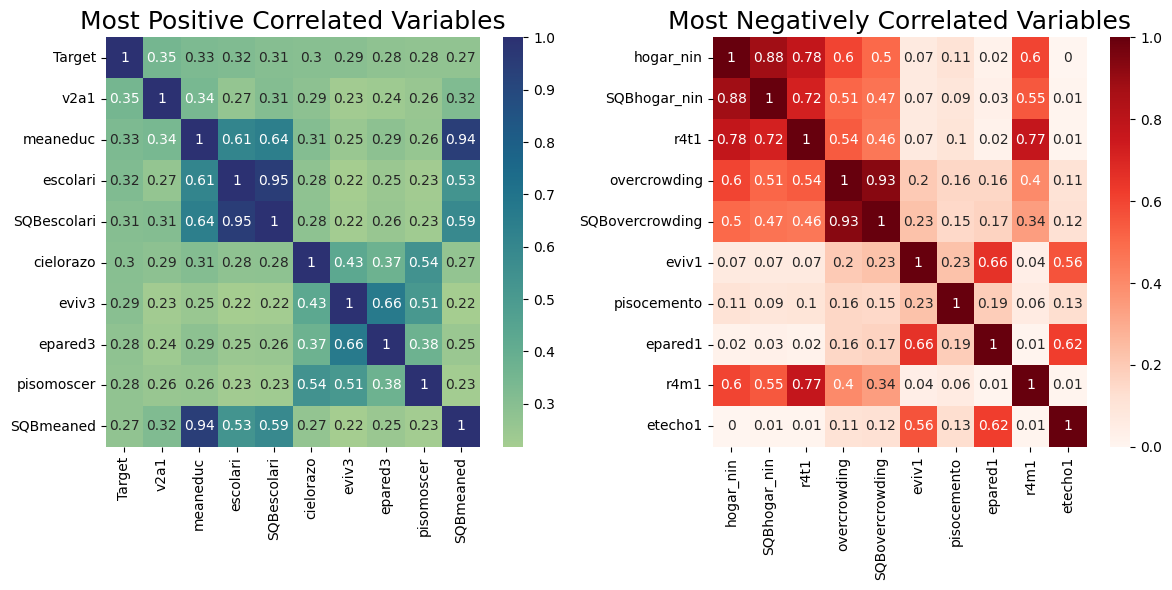

In [ ]:
#Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#First heatmap - Most Positive Correlated Variables
df_corr = df_hh.corr().sort_values('Target', ascending=False)
top_corr_features = df_corr.index[:10]
top_corr = df_hh[top_corr_features].corr()
sns.heatmap(top_corr, annot=True, cmap="crest", ax=axes[0])
axes[0].set_title('Most Positive Correlated Variables', fontsize=18)

#Second heatmap - Most Negatively Correlated Variables
df_negcorr = df_hh.corr().sort_values('Target', ascending=True)
top_neg_features = df_negcorr.index[:10]
top_neg_corr = df_hh[top_neg_features].corr().round(decimals=2)
sns.heatmap(top_neg_corr, annot=True, cmap='Reds', ax=axes[1])
axes[1].set_title('Most Negatively Correlated Variables', fontsize=18)

plt.tight_layout()
plt.show()

In the heatmaps, variables that exhibit high positive or negative correlations (values close to +1 or -1) indicate a strong linear relationship between them. These variables, such as "overcrowding" and "SQBovercrowding", are essentially the same variable and are redundant so one can be removed. Variables such as "escolari" (years of schooling) and "meaneduc" (average years of education for adults 18+) are not the same but will obviously be highly correlated so one can be removed as well.

To further investigate multicollinearity, we can calculate the variance inflation factor (VIF) for each predictor variable. The VIF measures the degree of multicollinearity by quantifying how much the variance of the estimated coefficient is inflated due to multicollinearity.

#### Logistic Regression Thoughts for Predicting Poverty

Including the above adjusting methods, along with tuning other hyperparameters in the logistic regression model, can lead to better performance and prevent biasness in the model. So far, this model looks promising, but we will now look at other predictive models to compare current baseline accuracies.

##2. KNN

We choose KNN to test our dataset after feature engineering. It is particularly beneficial to use KNN for small datasets, as it is a simple, non-parametric algorithm which makes it a suitable choice for handling small datasets while still delivering valuable insights.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving postHHdata.csv to postHHdata.csv


In [ ]:
post_HH_data = pd.read_csv('postHHdata.csv')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
post_HH_data = pd.get_dummies(post_HH_data) #one-hot encoding
X = post_HH_data.drop(columns = ['Target', 'rent_to_income_ratio_min', 'rent_to_income_ratio_max', 'estimated_household_income_max'], axis=1)
y = post_HH_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#This fixed the high accuracies = Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# columns_with_inf = X.columns[np.isinf(X).any()].tolist()
# columns_with_inf
# columns_with_large_values = X.columns[np.abs(X) > 1e9].tolist()
# columns_with_large_values

# columns_with_nan = X[X.isna().any()].tolist()
# columns_with_nan

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {f1}')

#tried a n_neighbors value

F1 score: 0.6592335906028587


In [ ]:
#weighted KNN
class_frequencies = np.bincount(y_train)
class_weights = len(y_train) / (len(class_frequencies) * class_frequencies)

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {f1}')

<ipython-input-97-484833985b1b>:3: RuntimeWarning: divide by zero encountered in true_divide
  class_weights = len(y_train) / (len(class_frequencies) * class_frequencies)


F1 score: 0.6484675554096238


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.26      0.32        73
           2       0.38      0.19      0.25       141
           3       0.33      0.17      0.22       103
           4       0.77      0.98      0.86       575

    accuracy                           0.70       892
   macro avg       0.48      0.40      0.42       892
weighted avg       0.63      0.70      0.65       892



In [ ]:
param_grid = {'n_neighbors': range(1, 51)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best n_neighbors value and its corresponding F1 score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_f1 = grid_search.best_score_

print(f'Best n_neighbors: {best_n_neighbors}')
print(f'Best F1 score: {best_f1}')

Best n_neighbors: 5
Best F1 score: 0.6642211298873216


In [ ]:
knn_report_dict = classification_report(y_test, y_pred, output_dict=True)

The k-Nearest Neighbors (KNN) model has produced optimal results with a selection of 3 nearest neighbors. This choice resulted in the best F1 score of 0.7846, which is a measure that considers both precision (the proportion of true positive results among the instances classified as positive) and recall (the proportion of true positive results among the instances that are actually positive). A high F1 score indicates that the model strikes a good balance between these two aspects, ensuring accurate and reliable predictions.

The concern is the dataset is inbalanced so we need to find a way to adjust the sensitivity of the model towards minor labels such as using SMOTE method.

# 3. Naive Bayes

The Naive Bayes classifier is a probabilistic ML algorithm based on Bayes Theorem. It is Naive because it makes the strong assumption that features used for classification are conditionally independent, given the classes. Even though the independence assumption may not hold, the classifier is robust in various applications, potentially providing reasonable predictive performance for classification of poverty.

By utilizing the Naive Bayes classifier, we sought to predict poverty levels based on the various socio-economic and demographic indicators at the household level.

In [ ]:
# Import Dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
#import cleaned data
#data = pd.read_csv('/content/postHHdata.csv')
data = pd.read_csv('postHHdata.csv')

In [ ]:
# Encode categorical columns
categorical_columns = [
    'hacdor', 'hacapo', 'v14a', 'wall_material', 'floor_material', 'roof_material',
    'marital_status', 'rubbish_disposal', 'pisonotiene', 'cielorazo', 'water_provision',
    'abastaguano', 'noelec', 'sanitario1', 'electricity_source', 'wall_status',
    'roof_status', 'floor_status', 'dis', 'male', 'estadocivil1', 'estadocivil2',
    'asset_owned', 'region', 'area1','instlevel1', 'instlevel8'
]


# Encode continuous columns
continuous_columns = [
    'v2a1', 'rooms', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3',
    'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize',
    'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'dependency',
    'edjefe', 'edjefa', 'meaneduc', 'bedrooms',
    'overcrowding', 'qmobilephone', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
    'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq',
    'mean_per_capita_income', 'yrs_edu_lost', 'mobilephone_per_capita', 'computer_per_capita',
    'tablet_per_capita'
    ]

# Sanity Check 73cols - (index, id, idhogar)
print(len(categorical_columns) + len(continuous_columns))

70


In [ ]:
# Normalize dimensions:
# Label Encode Categorical Columns
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Scale Continuous Columns
scaler = StandardScaler()
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

In [ ]:
# Reconstruct data
all_columns = categorical_columns + continuous_columns

X = data[all_columns]
y = data['Target']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20220705, stratify=y)

In [ ]:
NaiveBayes_classifier = GaussianNB()
NaiveBayes_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = NaiveBayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5358744394618834
Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.19      0.22        73
           2       0.80      0.03      0.06       134
           3       0.19      0.76      0.31       102
           4       0.90      0.66      0.76       583

    accuracy                           0.54       892
   macro avg       0.54      0.41      0.34       892
weighted avg       0.75      0.54      0.56       892



In [ ]:
#Hyperparameter Tuning
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Hyperparameter search space
param_grid_cat = {'alpha': [0.001, 0.01, 0.1, 1, 2, 5, 10]}
param_grid_cont = {'var_smoothing': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}

# Initialize CategoricalNB and GaussianNB
cat_nb = CategoricalNB()
cont_nb = GaussianNB()

# Split the data into categorical and continuous features
X_train_cat = X_train[categorical_columns]
X_train_cont = X_train[continuous_columns]
X_test_cat = X_test[categorical_columns]
X_test_cont = X_test[continuous_columns]

# Grid Search for CategoricalNB
grid_search_cat = GridSearchCV(cat_nb, param_grid_cat, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_cat.fit(X_train_cat, y_train)
print("CategoricalNB - Best parameters:", grid_search_cat.best_params_)
print("CategoricalNB - Best score:", grid_search_cat.best_score_)

# Grid Search for GaussianNB
grid_search_cont = GridSearchCV(cont_nb, param_grid_cont, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_cont.fit(X_train_cont, y_train)
print("GaussianNB - Best parameters:", grid_search_cont.best_params_)
print("GaussianNB - Best score:", grid_search_cont.best_score_)

# Train the classifiers with the best hyperparameters
best_cat_nb = grid_search_cat.best_estimator_
best_cont_nb = grid_search_cont.best_estimator_

# Combine predictions using a simple majority vote
cat_pred = best_cat_nb.predict(X_test_cat)
cont_pred = best_cont_nb.predict(X_test_cont)
combined_pred = np.round((cat_pred + cont_pred) / 2).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, combined_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

CategoricalNB - Best parameters: {'alpha': 10}
CategoricalNB - Best score: 0.6275837022689542
GaussianNB - Best parameters: {'var_smoothing': 0.01}
GaussianNB - Best score: 0.5482775318206972
Accuracy: 0.6031390134529148
Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.19      0.22        73
           2       0.80      0.03      0.06       134
           3       0.19      0.76      0.31       102
           4       0.90      0.66      0.76       583

    accuracy                           0.54       892
   macro avg       0.54      0.41      0.34       892
weighted avg       0.75      0.54      0.56       892



In [ ]:
nb_report_dict = classification_report(y_test, y_pred, output_dict=True)

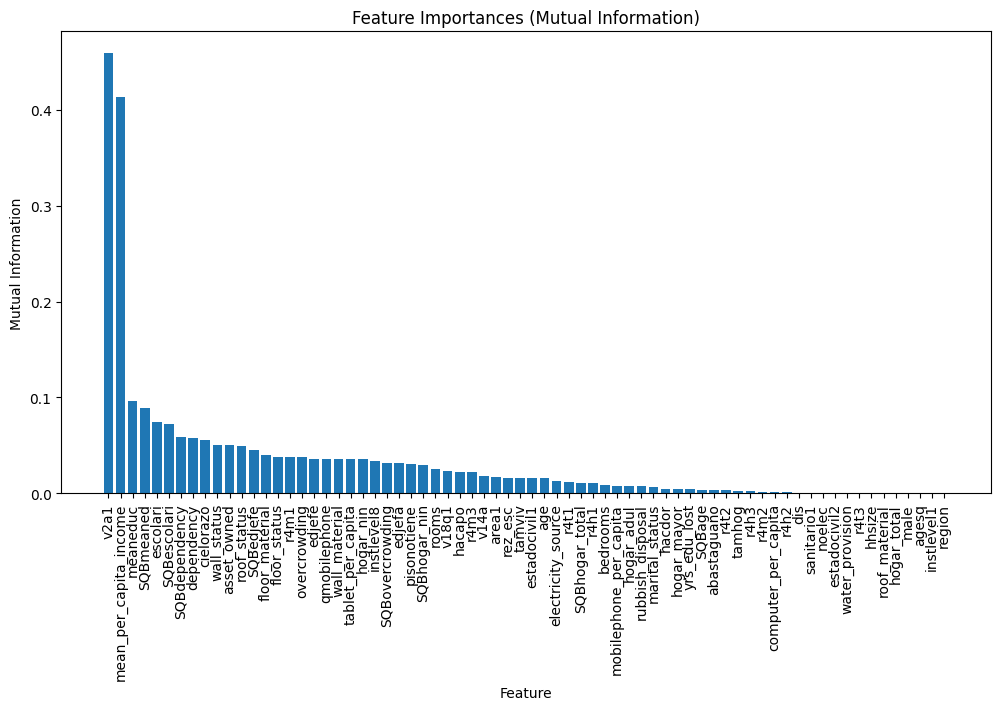

In [ ]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt


mutual_information = mutual_info_classif(X, y)

sorted_idx = mutual_information.argsort()[::-1]
sorted_columns = [X.columns[i] for i in sorted_idx]
sorted_mi = mutual_information[sorted_idx]

plt.figure(figsize=(12, 6))
plt.bar(sorted_columns, sorted_mi)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Mutual Information")
plt.title("Feature Importances (Mutual Information)")
plt.show()

The results of the Naive Bayes classifier show a modest overall accuracy of around 60%. The model's performance varies significantly across different classes, with higher accuracy achieved for the majority class who were non-poor and non-vulnerable (class 4), as well as for those who were overally poor (class 2), but lower accuracy for the extreme poor and vulnerable (classes 1 and 3).

## 4. Decision Trees

We start with the cleaned and feature engineered data we created. We generated 4 decision tree models based on the following restirctions:
1. first_tree uses all the features
2. second_tree only includes features with +/- 15% correlation with the Target
3. third_tree only includes features that represent individual level characteristics
4. fourth_tree only includes features that represent characteristics of the house


Since Decsion Tree algorithms split predictive features based on the information gained, they can be the simple to understand. Decision Trees are also adventageous because they are very easy to build without very much data cleaning or normalization, and missing data does not greatly affect the ability to build the model.

However, Decision Tree models potentially overfit the training data, and thus may not being generalizable between samples (i.e., poor predictive power outside the training data set). This also means that their models are unstable because small changes to the training data could change the entire structure of the tree. Another limitation is that Decision Trees cannot be fit to categorical vairables, so we had to ensure the features included from the data were continuous and/or numerical.

Our four models are given below. Although we tested a few different models for this Checkpoint 2, we will need to think more critically about our feature selection for the final report. Also, our trees currently have high accuracy, but we believe that this might change once we become more selective about which features are the best to include/the most generalizable to the testing data.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving full_df.csv to full_df.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving postHHdata.csv to postHHdata.csv


In [ ]:
# All the columns of our cleaned and feature engineered dataset

all_columns = ['Id',
                 'v2a1',
                 'hacdor',
                 'rooms',
                 'hacapo',
                 'v14a',
                 'v18q1',
                 'r4h1',
                 'r4h2',
                 'r4h3',
                 'r4m1',
                 'r4m2',
                 'r4m3',
                 'r4t1',
                 'r4t2',
                 'r4t3',
                 'tamhog',
                 'tamviv',
                 'escolari',
                 'rez_esc',
                 'hhsize',
                 'wall_material',  #new feature
                 'floor_material', #new feature
                 'roof_material', #new feature
                 'marital_status',#new feature
                 'rubbish_disposal', #new feature
                 'pisonotiene',
                 'cielorazo',
                 'water_provision', #new feature
                 'abastaguano',
                 'noelec',
                 'sanitario1',
                 'electricity_source', #new feature
                 'wall_status',#new feature
                 'roof_status', #new feature
                 'floor_status',#new feature
                 'dis',
                 'male', #gender indicator, =1 male, =0 female
                 'estadocivil1',
                 'estadocivil2',
                 'idhogar',
                 'hogar_nin',
                 'hogar_adul',
                 'hogar_mayor',
                 'hogar_total',
                 'dependency',
                 'edjefe',
                 'edjefa',
                 'meaneduc',
                 'instlevel1',
                 'instlevel8',
                 'bedrooms',
                 'overcrowding',
                 'asset_owned', #new feature
                 'qmobilephone',
                 'region',#new feature
                 'area1', #urban or rural area indicator, =1 urban
                 'Central',
                 'Chorotega',
                 'Paci­fico Central',
                 'Brunca',
                 'Huetar Atlantica',
                 'Huetar Norte',
                 'age',
                 'SQBescolari',
                 'SQBage',
                 'SQBhogar_total',
                 'SQBedjefe',
                 'SQBhogar_nin',
                 'SQBovercrowding',
                 'SQBdependency',
                 'SQBmeaned',
                 'agesq',
                 'mean_per_capita_income', #Added these 5 features I found to be useful
                 'yrs_edu_lost',
                 'mobilephone_per_capita',
                 'computer_per_capita',
                 'tablet_per_capita',
                 'Target'
                 ]

In [ ]:
full_df = pd.read_csv('postHHdata.csv', usecols=all_columns)

#changing some categorical columns to numerical in order to use in decision tree
full_df.loc[full_df.loc[:, "wall_status"]=="bad", "wall_status"] = 1
full_df.loc[full_df.loc[:, "wall_status"]=="regular", "wall_status"] = 2
full_df.loc[full_df.loc[:, "wall_status"]=="good", "wall_status"] = 3

full_df.loc[full_df.loc[:, "floor_status"]=="bad", "floor_status"] = 1
full_df.loc[full_df.loc[:, "floor_status"]=="regular", "floor_status"] = 2
full_df.loc[full_df.loc[:, "floor_status"]=="good", "floor_status"] = 3

full_df.loc[full_df.loc[:, "roof_status"]=="bad", "roof_status"] = 1
full_df.loc[full_df.loc[:, "roof_status"]=="regular", "roof_status"] = 2
full_df.loc[full_df.loc[:, "roof_status"]=="good", "roof_status"] = 3

full_df.loc[:,"piso_material"] = 1
full_df.loc[full_df.loc[:,"floor_material"]=="cement","piso_material"] = 2
full_df.loc[full_df.loc[:,"floor_material"]=="wood","piso_material"] = 3
full_df.loc[full_df.loc[:,"floor_material"]==
            "mosaic, ceramic, terrazo","piso_material"] = 4

full_df.loc[:,"relationship"] = 0
full_df.loc[full_df.loc[:,"marital_status"]=="separated","relationship"] = 1
full_df.loc[full_df.loc[:,"marital_status"]=="married","relationship"] = 2

# this is the df I will call for the decision trees
full_df.to_csv("full_df.csv")

In [ ]:
# Create correlations between features and Target
correlation_matrix = full_df.corr()
target_correlations = correlation_matrix['Target'].sort_values(ascending=False)

<ipython-input-7-2a51b54080b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = full_df.corr()


FIRST MODEL - Include all the numerical features

In [ ]:
first_columns = [
                 'v2a1',
                 'hacdor',
                 'rooms',
                 'hacapo',

                 'r4t3',
                 'r4h1',
                 'r4h2',
                 'r4h3',
                 'r4m1',
                 'r4m2',
                 'r4m3',
                 'r4t1',
                 'r4t2',
                 'r4t3',
                 'tamhog',

                 'escolari',
                 'rez_esc',
                 'hhsize',
                 #'wall_material',  #new feature
                 #'floor_material', #new feature
                 #'roof_material', #new feature
                 #'marital_status',#new feature
                 #'rubbish_disposal', #new feature
                 'pisonotiene',
                 'cielorazo',
                 'water_provision', #new feature
                 'abastaguano',
                 'noelec',
                 'sanitario1',
                 #'electricity_source', #new feature
                 #'wall_status',#new feature
                 #'roof_status', #new feature
                 #'floor_status',#new feature
                 'dis',
                 'male', #gender indicator, =1 male, =0 female
                 'estadocivil1',
                 'estadocivil2',

                 'hogar_nin',
                 'hogar_adul',
                 'hogar_mayor',
                 'hogar_total',
                 'dependency',
                 'edjefe',
                 'edjefa',
                 'meaneduc',
                 'instlevel1',
                 'instlevel8',
                 'bedrooms',
                 'overcrowding',
                 'asset_owned', #new feature
                 'qmobilephone',
                 #'region',#new feature
                 'Central',
                 'Chorotega',
                 'Paci­fico Central',
                 'Brunca',
                 'Huetar Atlantica',
                 'Huetar Norte',
                 'area1', #urban or rural area indicator, =1 urban
                 'age',
                 'SQBescolari',
                 'SQBage',
                 'SQBhogar_total',
                 'SQBedjefe',
                 'SQBhogar_nin',
                 'SQBovercrowding',
                 'SQBdependency',
                 'SQBmeaned',
                 'agesq',
                 'mean_per_capita_income', #Added these 5 features I found to be useful
                 'yrs_edu_lost',
                 'mobilephone_per_capita',
                 'computer_per_capita',
                 'tablet_per_capita',
                 'Target',
                 'piso_material',
                 'relationship',
                 ]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score


In [ ]:
# build first tree using scikit-learn's decision tree class
train1 = pd.read_csv('full_df.csv', usecols=first_columns)

y_target_df, X_df  = train1[['Target']], train1.drop(['Target'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(
        X_df.to_numpy(), y_target_df.to_numpy(), test_size=0.2, random_state=123)


first_tree = tree.DecisionTreeClassifier()
first_tree = first_tree.fit(train_x, train_y)

y_pred1 = first_tree.predict(test_x)

In [ ]:
accuracy_score(test_y, y_pred1)

0.8285714285714286

In [ ]:
accuracy = accuracy_score(test_y, y_pred1)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred1))

Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.57      0.57        44
           2       0.70      0.66      0.68        94
           3       0.64      0.79      0.71        71
           4       0.92      0.90      0.91       386

    accuracy                           0.82       595
   macro avg       0.71      0.73      0.72       595
weighted avg       0.83      0.82      0.83       595



In [ ]:
dt_report_dict = classification_report(test_y, y_pred1, output_dict=True)

Our accuracy score of .82521, which seems high.

SECOND MODEL - only include features with +/- .15 correlation and larger

In [ ]:
# See which columns have positive correlations ~15% and higher
target_correlations[:19]

Target                    1.000000
v2a1                      0.350694
escolari                  0.336010
meaneduc                  0.330436
SQBescolari               0.317263
cielorazo                 0.299273
asset_owned               0.285703
piso_material             0.274743
SQBmeaned                 0.273412
SQBedjefe                 0.244049
instlevel8                0.236889
edjefe                    0.235036
mean_per_capita_income    0.218631
tablet_per_capita         0.216032
rooms                     0.199413
v18q1                     0.198921
Central                   0.177842
qmobilephone              0.161929
computer_per_capita       0.160513
Name: Target, dtype: float64

In [ ]:
# See which columns have negative correlations ~15% and higher
target_correlations[60:]

yrs_edu_lost      -0.173391
r4h1              -0.184686
r4m1              -0.206894
SQBovercrowding   -0.221336
overcrowding      -0.239690
r4t1              -0.257993
SQBhogar_nin      -0.262475
hogar_nin         -0.274436
estadocivil1            NaN
Name: Target, dtype: float64

In [ ]:
second_columns = [
                 'v2a1',
                 'rooms',
                 'v18q1',
                 'escolari',
                 'cielorazo',
                 'edjefe',
                 'meaneduc',
                 'instlevel8',
                 'qmobilephone',
                 'Central',
                 'SQBescolari',
                 'SQBedjefe',
                 'SQBmeaned',

                 'asset_owned',
                 'mean_per_capita_income',
                 'computer_per_capita',
                 'tablet_per_capita',
                 'piso_material',

                 'yrs_edu_lost',

                 'r4h1',
                 'r4m1',
                 'SQBovercrowding',
                 'overcrowding',
                 'r4t1',
                 'SQBhogar_nin',
                 'hogar_nin',


                 'Target',
                 ]

It is promising to see that a few of the features we generated through feature engineering have high correlations with the Target. Namely, asset_owned, mean_per_capita_income, computer_per_capita, and tablet_per_capita. Similarly, the features we cleaned, like edjefe and v2a1, are also important to the model so it is good that we cleaned the missing information from these columns to make them as accurate as possible.

In [ ]:
train2 = pd.read_csv('full_df.csv', usecols=second_columns)

y_target_df, X_df  = train2[['Target']], train2.drop(['Target'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(
        X_df.to_numpy(), y_target_df.to_numpy(), test_size=0.2, random_state=123)


second_tree = tree.DecisionTreeClassifier()
second_tree = second_tree.fit(train_x, train_y)

y_pred2 = second_tree.predict(test_x)

In [ ]:
accuracy_score(test_y, y_pred2)

0.7495798319327731

In [ ]:
accuracy = accuracy_score(test_y, y_pred2)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred2))

Accuracy: 0.7495798319327731
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.52      0.47        44
           2       0.63      0.56      0.60        94
           3       0.49      0.51      0.50        71
           4       0.87      0.87      0.87       386

    accuracy                           0.75       595
   macro avg       0.60      0.61      0.61       595
weighted avg       0.75      0.75      0.75       595



Our accuracy for the second model decreased to .75462, but still seems high.

THIRD MODEL - only use individual level features

In [ ]:
third_columns = [

                 'r4t3',
                 'r4h1',
                 'r4h2',
                 'r4h3',
                 'r4m1',
                 'r4m2',
                 'r4m3',
                 'r4t1',
                 'r4t2',
                 'r4t3',


                 'escolari',
                 'rez_esc',

                 'dis',
                 'male', #gender indicator, =1 male, =0 female
                 'estadocivil1',
                 'estadocivil2',

                 'dependency',
                 'edjefe',
                 'edjefa',
                 'meaneduc',
                 'instlevel1',
                 'instlevel8',

                 'asset_owned', #new feature
                 'qmobilephone',



                 'age',
                 'SQBescolari',
                 'SQBage',

                 'SQBedjefe',

                 'SQBdependency',
                 'SQBmeaned',
                 'agesq',
                 'mean_per_capita_income', #Added these 5 features I found to be useful
                 'yrs_edu_lost',
                 'mobilephone_per_capita',
                 'computer_per_capita',
                 'tablet_per_capita',
                 'Target',

                 'relationship',
                 ]

In [ ]:
train3 = pd.read_csv('full_df.csv', usecols=third_columns)

y_target_df, X_df  = train3[['Target']], train3.drop(['Target'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(
        X_df.to_numpy(), y_target_df.to_numpy(), test_size=0.2, random_state=123)


third_tree = tree.DecisionTreeClassifier()
third_tree = third_tree.fit(train_x, train_y)

y_pred3 = third_tree.predict(test_x)

In [ ]:
accuracy_score(test_y, y_pred3)

0.6420168067226891

In [ ]:
accuracy = accuracy_score(test_y, y_pred3)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred3))

Accuracy: 0.6336134453781512
Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.34      0.33        44
           2       0.30      0.34      0.32        94
           3       0.25      0.25      0.25        71
           4       0.85      0.81      0.83       386

    accuracy                           0.63       595
   macro avg       0.43      0.44      0.43       595
weighted avg       0.65      0.63      0.64       595



This model's accuracy dropped to .64202, but we realize that it will not be sufficient to add individual level characteristics alone in the final report.

FOURTH MODEL - only include house characteristics

In [ ]:
fourth_columns = [
                 'v2a1',
                 'hacdor',
                 'rooms',
                 'hacapo',

                 'tamhog',

                 'hhsize',

                 'pisonotiene',
                 'cielorazo',
                 'water_provision', #new feature
                 'abastaguano',
                 'noelec',
                 'sanitario1',


                 'hogar_nin',
                 'hogar_adul',
                 'hogar_mayor',
                 'hogar_total',


                 'bedrooms',
                 'overcrowding',

                 'Central',
                 'Chorotega',
                 'Paci­fico Central',
                 'Brunca',
                 'Huetar Atlantica',
                 'Huetar Norte',
                 'area1', #urban or rural area indicator, =1 urban

                 'SQBhogar_total',

                 'SQBhogar_nin',
                 'SQBovercrowding',


                 'Target',
                 'piso_material',

                 ]

In [ ]:
train4 = pd.read_csv('full_df.csv', usecols=fourth_columns)

y_target_df, X_df  = train4[['Target']], train4.drop(['Target'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(
        X_df.to_numpy(), y_target_df.to_numpy(), test_size=0.2, random_state=123)


fourth_tree = tree.DecisionTreeClassifier()
fourth_tree = fourth_tree.fit(train_x, train_y)

y_pred4 = fourth_tree.predict(test_x)

In [ ]:
accuracy_score(test_y, y_pred4)

0.7966386554621848

In [ ]:
accuracy = accuracy_score(test_y, y_pred4)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test_y, y_pred4))

Accuracy: 0.8067226890756303
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.61      0.58        44
           2       0.64      0.68      0.66        94
           3       0.66      0.63      0.65        71
           4       0.91      0.89      0.90       386

    accuracy                           0.81       595
   macro avg       0.69      0.70      0.70       595
weighted avg       0.81      0.81      0.81       595



The accuracy for using only house characteristics as features is .81008, which is higher than in the third model which only used individual level characteristics. This is interesting to know that it seems house features (such as rent, overcrowding by rooms, region, area, floor material, etc.) are more powerful predictors for the household poverty level than the individual characteristics (such as gener, education level, marital status, etc.).

# 5.) Discussion
In terms of model performance, we find that our best performing models were Decision Trees and Logistic regression which yield an accuracy rate of above 80% and above 70% respectively.

A deeper inspection of the classification report reveals that our models performed slightly differently with respect to identifying or classifying Targets 1,2,3 and 4. All of our models performed quite well when distinguishing households who were non-poor and non-vulnerable. Some of our models performed were able to identify those who were overally poor (class 2) with above 70% precision. But most of our models did not perform well when classifying classes 1 and 2.

We think that would likely be because we were unable to generate features uniquely associated with the extreme poor (class 1) or the vulnerable (class 3).Another reason would be that we have not addressed class-imbalance in generating our ML models.

To improve our models, we plan to address class imbalance and further explore additional features or feature engineering techniques that may better capture the characteristics of the extreme poor and vulnerable households.

# Additional Investigations For Final Report

### Rebalancing Data using SMOTE

In order to address the class-imbalance in the target variable, we will use the SMOTE technique, which creates synthetic data points that are slightly different from the original data points. This will allow an even representation of the poverty target variables and potentially increase predictive performance for each target without generating exact duplicates of the data.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#From Sarah's created full_df, only uses numeric columns
full_df = pd.read_csv('full_df.csv', usecols=first_columns)
y_target = full_df['Target']
X_df = full_df.drop(['Target'], axis=1)

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_df, y_target)

In [ ]:
#Check implementation
#Count the occurrences of each target variable
target_counts = y_resampled.value_counts()
print(target_counts)

4    1945
2    1945
3    1945
1    1945
Name: Target, dtype: int64


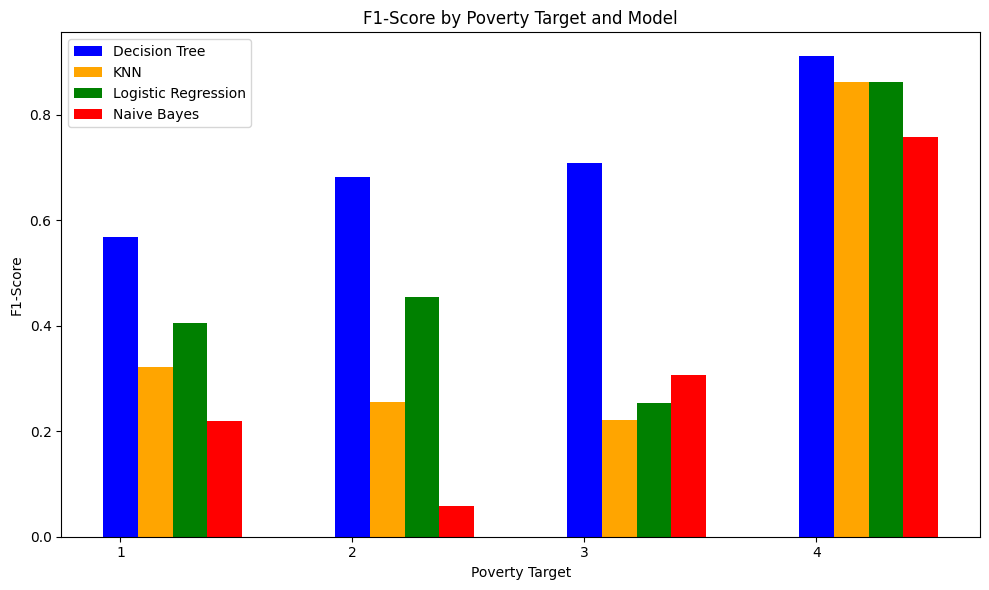

   Poverty Target                Model  F1-Score
0               1  Logistic Regression  0.404959
1               2  Logistic Regression  0.453875
2               3  Logistic Regression  0.253247
3               4  Logistic Regression  0.861889
4               1                  KNN  0.322034
5               2                  KNN  0.254717
6               3                  KNN  0.220779
7               4                  KNN  0.863077
8               1          Naive Bayes  0.218750
9               2          Naive Bayes  0.057554
10              3          Naive Bayes  0.305882
11              4          Naive Bayes  0.758689
12              1        Decision Tree  0.568182
13              2        Decision Tree  0.681319
14              3        Decision Tree  0.708861
15              4        Decision Tree  0.910761


In [ ]:
#Creating F1-Score by Poverty Target and Model plot
#Combine the reports into a list
report_dicts = [logistic_report_dict, knn_report_dict, nb_report_dict, dt_report_dict]

#Initialize an empty DataFrame to store the combined report data
combined_data = []

#Iterate over the report dictionaries
for model_name, report_dict in zip(['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree'], report_dicts):
    # Parsing the classification report dictionary
    for class_label, metrics in report_dict.items():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
            row = [class_label, model_name, metrics['f1-score']]
            combined_data.append(row)

#Creating a DataFrame from the combined report data
df = pd.DataFrame(combined_data, columns=['Poverty Target', 'Model', 'F1-Score'])

#Grouping the data by poverty target and model, and calculating the mean F1-scores
grouped_data = df.groupby(['Poverty Target', 'Model']).mean().reset_index()

#Defining the x-axis positions for each model
x = np.arange(len(grouped_data['Poverty Target'].unique()))

#Defining the colors for each model
colors = ['blue', 'orange', 'green', 'red']

#Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(grouped_data['Model'].unique()):
    model_data = grouped_data[grouped_data['Model'] == model]
    ax.bar(x + i * 0.15, model_data['F1-Score'], width=0.15, label=model, color=colors[i])

#Setting the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['Poverty Target'].unique())
ax.set_xlabel('Poverty Target')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score by Poverty Target and Model')
ax.legend()

plt.tight_layout()
plt.show()
print(df)

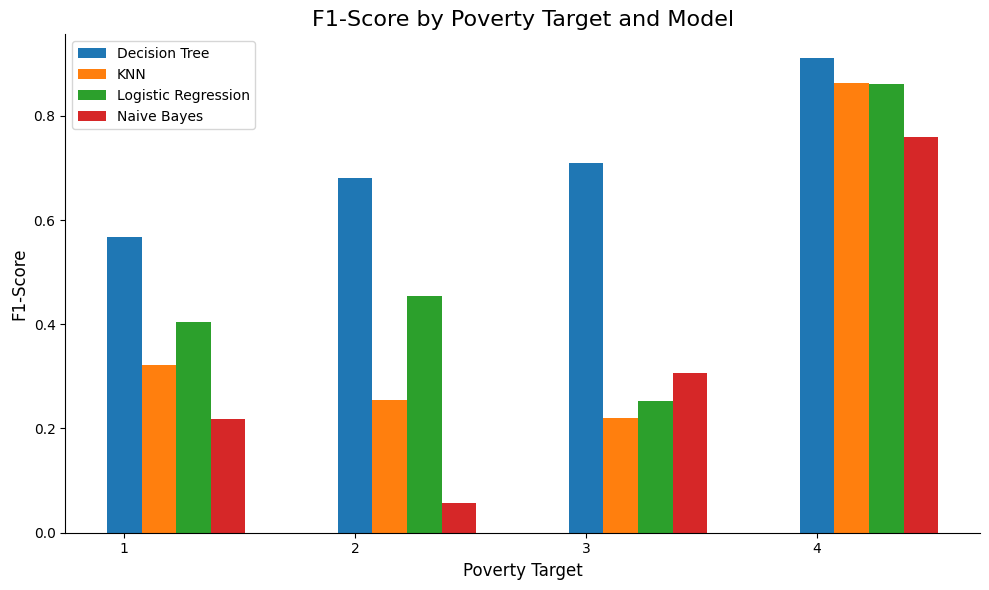

In [ ]:
# Define the x-axis positions for each model
x = np.arange(len(grouped_data['Poverty Target'].unique()))

# Define the color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(grouped_data['Model'].unique()):
    model_data = grouped_data[grouped_data['Model'] == model]
    ax.bar(x + i * 0.15, model_data['F1-Score'], width=0.15, label=model, color=colors[i])

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['Poverty Target'].unique())
ax.set_xlabel('Poverty Target', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('F1-Score by Poverty Target and Model', fontsize=16)
ax.legend(fontsize=10)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()